In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, auc, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold


# Loading Data

In [18]:
data = pd.read_csv('./data_processed/data_norm_dod.csv', index_col=0)
data.fillna(data.mean(), inplace=True)
data.los = (data.los <= 4).astype(int)

data_live = data[data.mortality == 0]
data_dead = data[data.mortality == 1]

data.drop(columns=['mortality'], inplace=True)
data_live.drop(columns=['mortality'], inplace=True)
data_dead.drop(columns=['mortality'], inplace=True)

C:\Users\sitdo\AppData\Local\Temp\ipykernel_24328\1394346544.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_live.drop(columns=['mortality'], inplace=True)
C:\Users\sitdo\AppData\Local\Temp\ipykernel_24328\1394346544.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dead.drop(columns=['mortality'], inplace=True)


In [19]:
def run(data):
    X = data.loc[:, data.columns != 'los']
    y = data.loc[:, data.columns == 'los']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LogisticRegression(max_iter=1000)

    model.fit(X_train, y_train)
    
    res = pd.DataFrame(model.coef_.reshape(-1), index=X.columns, columns=['Coefficient'])
    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy with best parameters: {accuracy * 100.0}")
    
    y_scores = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_scores)

    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(5, 5), dpi=300)

    plt.plot(fpr, 
            tpr, 
            color='darkorange', 
            lw=2, 
            label=f'ROC curve (area = {roc_auc:.2f})')

    plt.fill_between(fpr, tpr, color='darkorange', alpha=0.2)  # alpha 参数控制填充颜色的透明度


    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    
    return res

Accuracy with best parameters: 80.48780487804879


c:\Users\sitdo\.conda\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


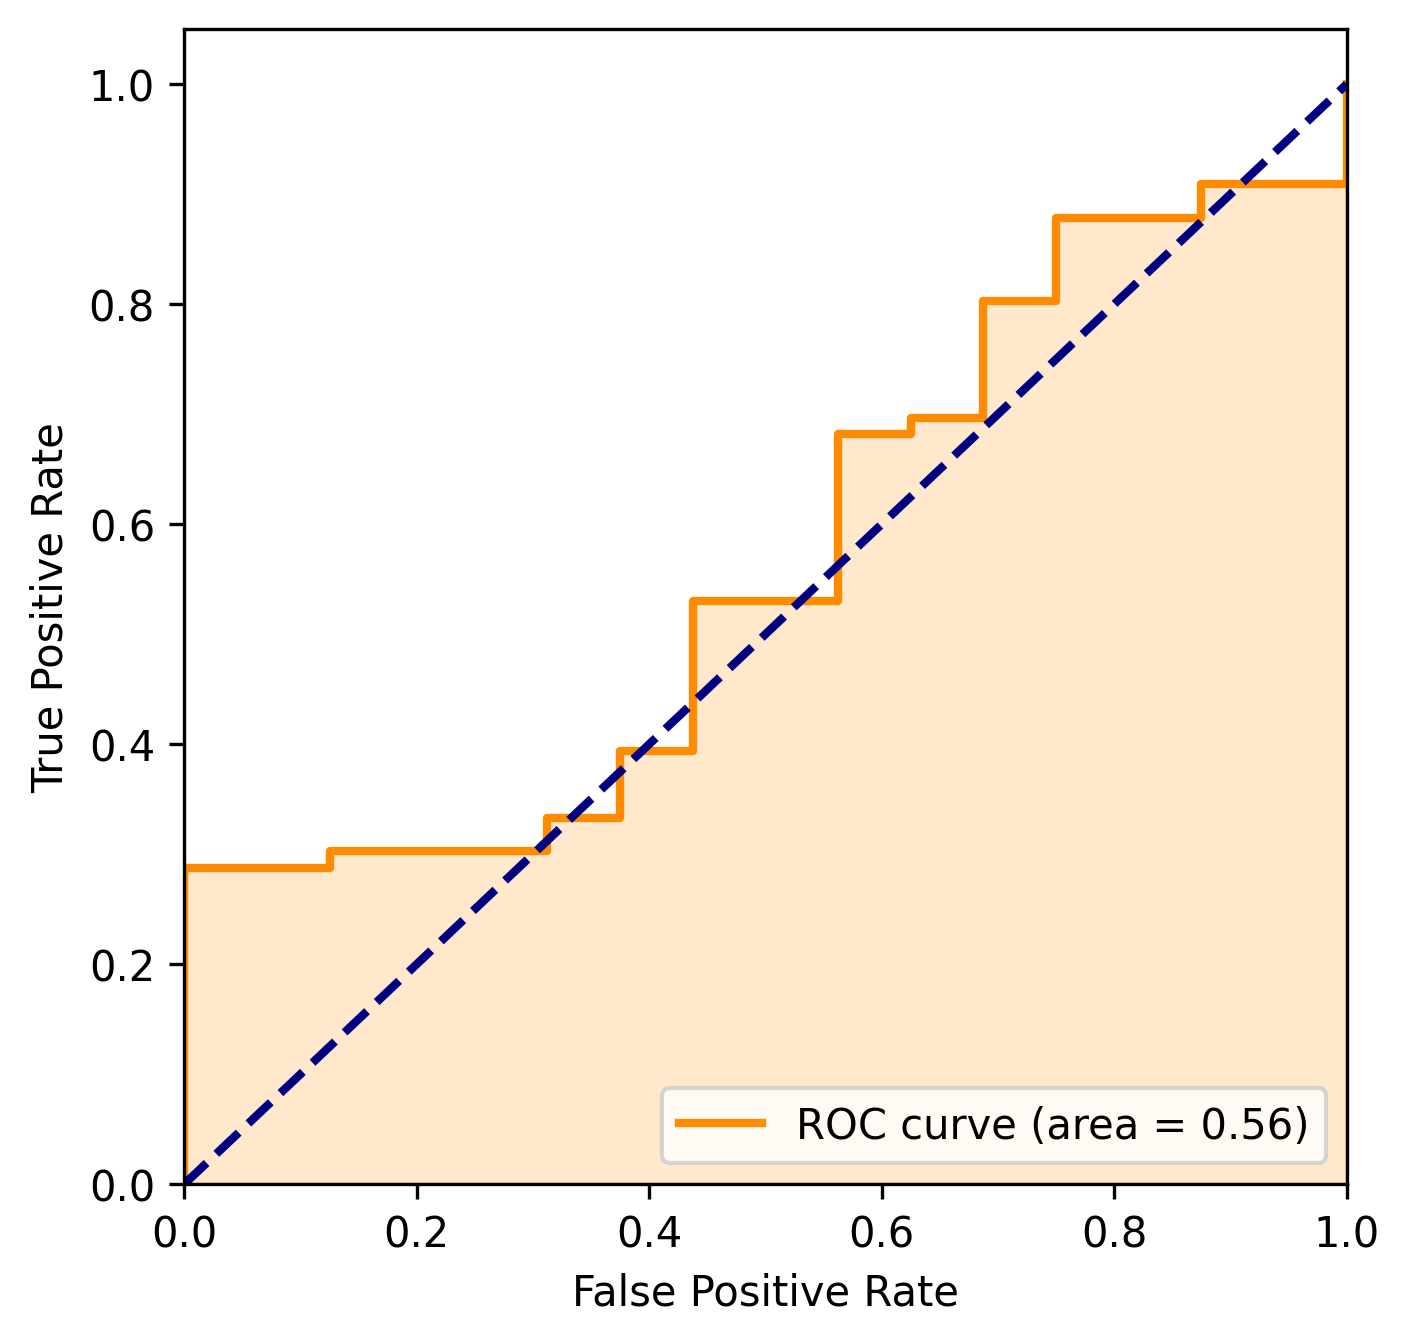

,Coefficient
gender,0.469292
age,-0.057597
heart_rate,-1.224044
respiratory_rate,-1.822462
hematocrit,0.364191
rdw,-0.578811
platelet,0.896503
mcv,-0.130848
mch,-0.159698
hemoglobin,0.233872


In [20]:
res_live = run(data_live)

res_live

Accuracy with best parameters: 76.0


c:\Users\sitdo\.conda\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


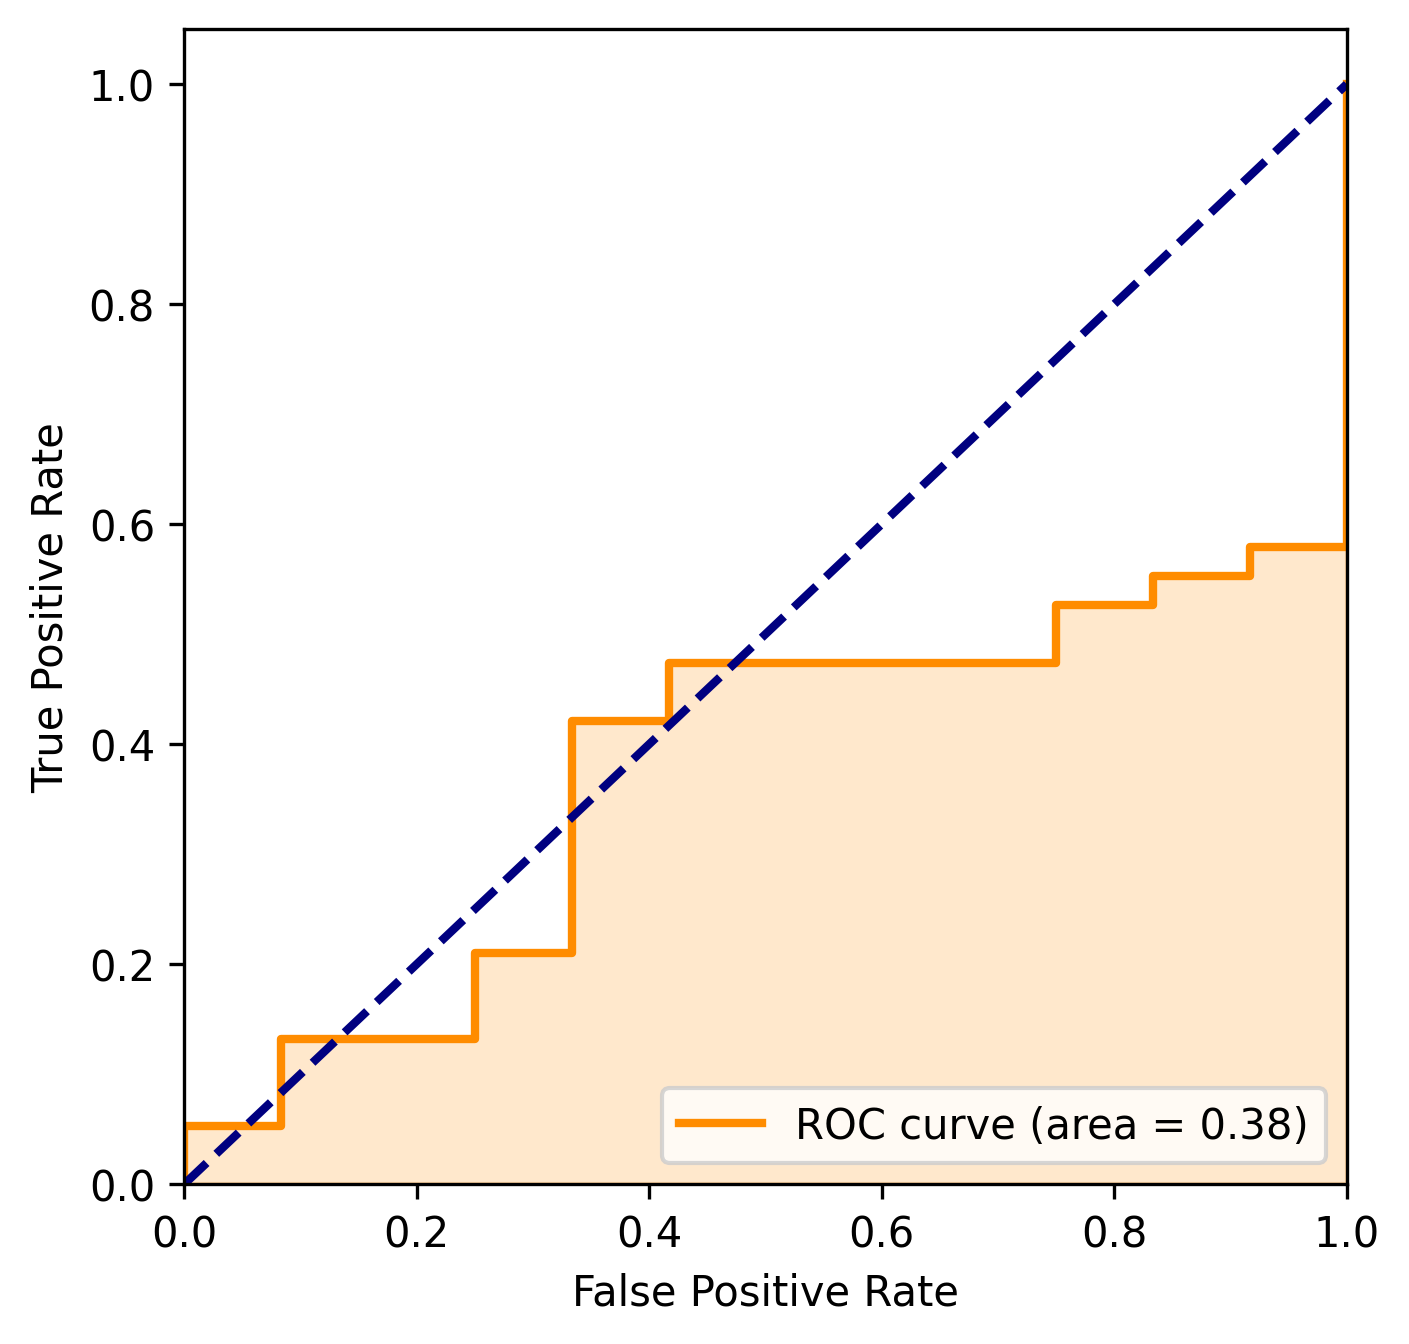

,Coefficient
gender,0.040028
age,0.787063
heart_rate,0.304061
respiratory_rate,-0.522459
hematocrit,0.137991
rdw,0.468068
platelet,-0.507927
mcv,-0.289429
mch,-0.596749
hemoglobin,-0.436926


In [22]:
res_dead = run(data_dead)

res_dead

c:\Users\sitdo\.conda\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy with best parameters: 79.38931297709924


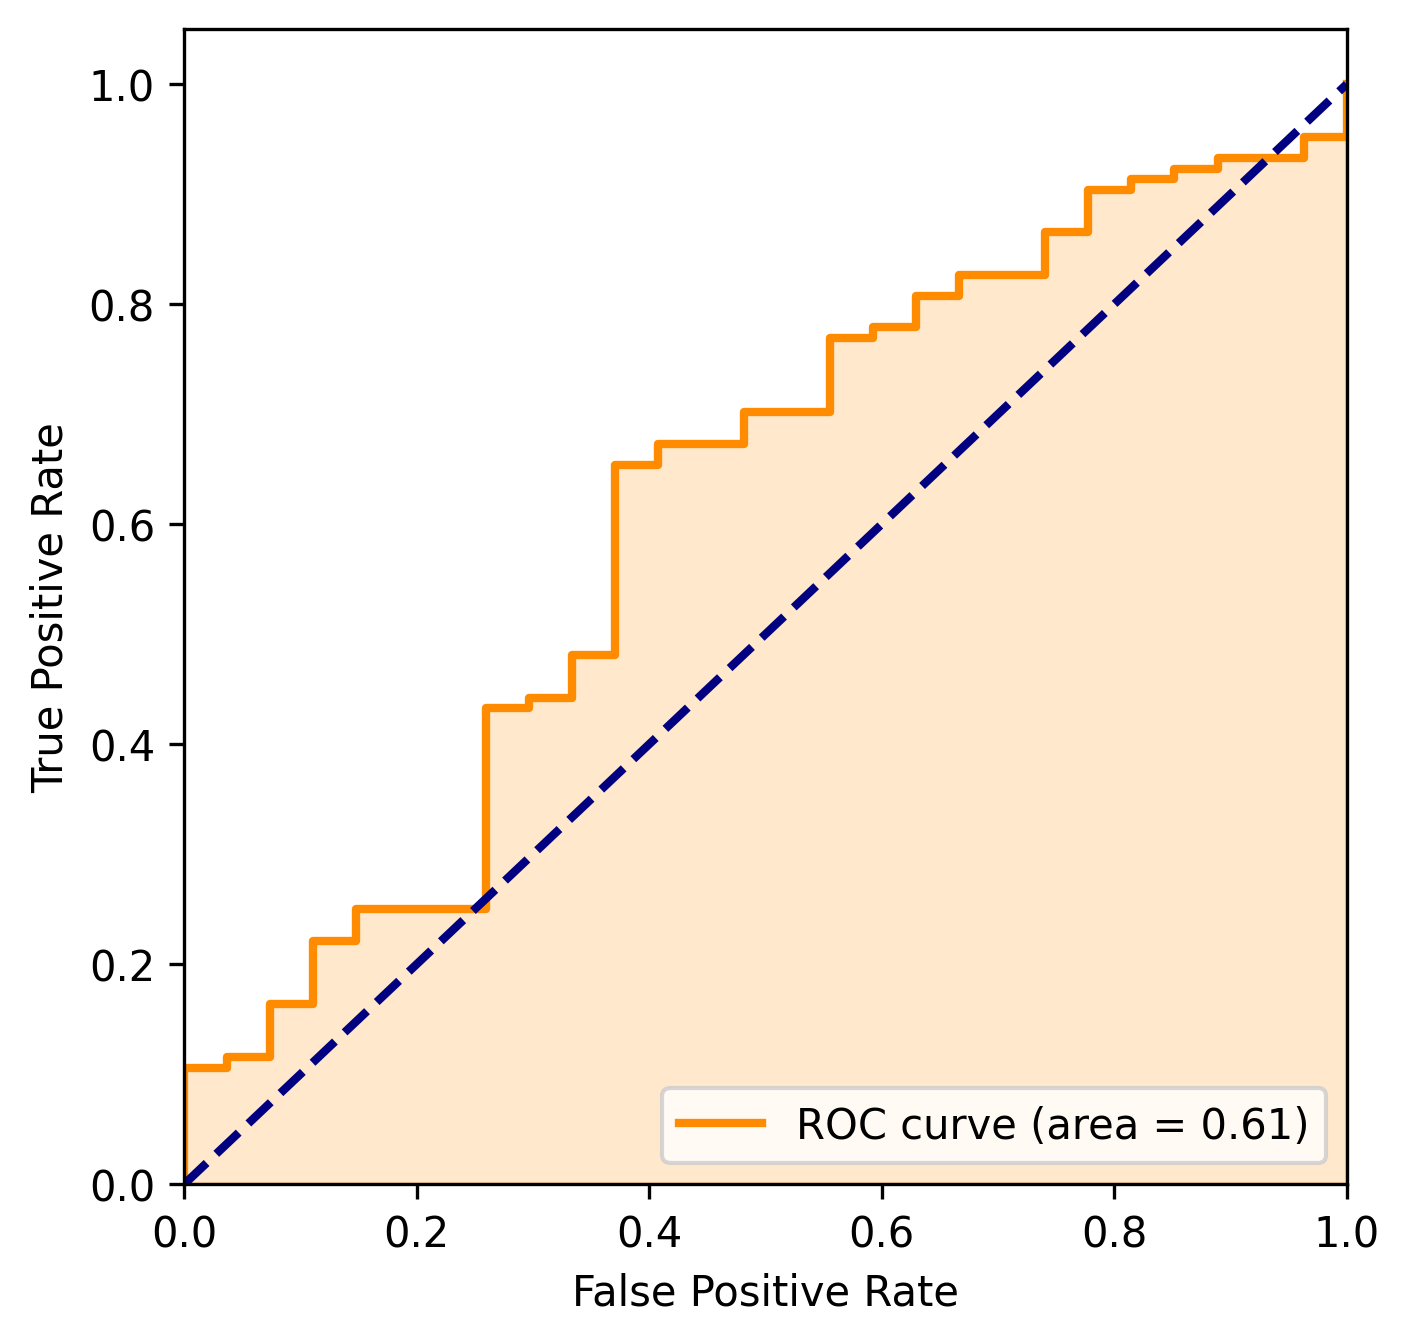

,Coefficient
gender,0.250823
age,0.100193
heart_rate,-0.906515
respiratory_rate,-1.663237
hematocrit,0.163204
rdw,-0.357756
platelet,-0.101161
mcv,-0.361060
mch,-0.463815
hemoglobin,0.178633


In [23]:
res = run(data)

res

In [9]:
model.coef_

array([[ 2.50822932e-01,  1.00192732e-01, -9.06515317e-01,
        -1.66323708e+00,  1.63204371e-01, -3.57756473e-01,
        -1.01161331e-01, -3.61059807e-01, -4.63815397e-01,
         1.78632798e-01, -2.16614545e-01, -1.52979881e-01,
        -5.14244177e-02, -1.31425081e-01,  8.74432136e-02,
         6.58140083e-04,  8.40725718e-02, -8.72563270e-02,
         2.39476340e-02,  9.80267224e-02, -1.79822929e-01,
        -1.84814521e-02]])

In [10]:
model.intercept_

array([2.89457939])